<a href="https://colab.research.google.com/github/prxska/Ev3MachineLearning/blob/main/DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision Tree**
Predecir el número de bajas por jugador en una partida (MatchKills) a partir de tres variables:

RoundStartingEquipmentValue

RLethalGrenadesThrown

RNonLethalGrenadesThrown


In [1]:
import pandas as pd
from google.colab import files

# Subir el archivo desde tu computadora
uploaded = files.upload()

# Get the name of the uploaded file
# files.upload() returns a dictionary where keys are filenames
uploaded_filename = list(uploaded.keys())[0]

# Cargar el CSV al DataFrame (usando el nombre del archivo subido)
# Use the actual uploaded_filename instead of the hardcoded name
df = pd.read_csv(uploaded_filename, sep=';')

# Limpiar columnas: convertir valores numéricos escritos como string
df['TravelledDistance'] = df['TravelledDistance'].astype(str).str.replace('.', '', regex=False)
df['TravelledDistance'] = pd.to_numeric(df['TravelledDistance'], errors='coerce')
df['RoundStartingEquipmentValue'] = pd.to_numeric(df['RoundStartingEquipmentValue'], errors='coerce')

# Eliminar valores nulos
df = df.dropna(subset=['TravelledDistance', 'RoundStartingEquipmentValue'])

# Ver las primeras filas
df[['RoundStartingEquipmentValue', 'TravelledDistance']].head()

Saving Anexo_ET_demo_round_traces_2022.csv to Anexo_ET_demo_round_traces_2022.csv


<ipython-input-1-0fa6240777f3>:13: DtypeWarning: Columns (6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(uploaded_filename, sep=';')


,RoundStartingEquipmentValue,TravelledDistance
0,750,1.008314e+16
1,800,6.096088e+16
2,1000,5.642252e+15
3,850,8.963473e+15
4,1000,1.086565e+16


In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split # Import train_test_split

# Definir variables
# Usar el mismo df para ambos (corregido de df_filtrado a df)
X_tree = df[['RoundStartingEquipmentValue', 'RLethalGrenadesThrown', 'RNonLethalGrenadesThrown']]
y_tree = df['MatchKills'] #variable usada
# División entrenamiento/prueba
X_train_t, X_test_t, y_train_t, y_test_t = train_test_split(X_tree, y_tree, test_size=0.2, random_state=42)

# Crear y entrenar modelo
tree_model = DecisionTreeRegressor(random_state=42)  # puedes probar sin max_depth también
tree_model.fit(X_train_t, y_train_t)

# Predicciones
y_pred_t = tree_model.predict(X_test_t)

# Evaluación
print("MSE (árbol de decisión):", mean_squared_error(y_test_t, y_pred_t))
print("R² (árbol de decisión):", r2_score(y_test_t, y_pred_t))

MSE (árbol de decisión): 37.47592407815711
R² (árbol de decisión): 0.018696872114800533


1. Decision Tree Regressor
Entrenaste un árbol de decisión con las variables anteriores.

Resultado:

MSE: 38.17

R²: 0.0245 (2.45%)

Conclusión: el modelo aprendió muy poco

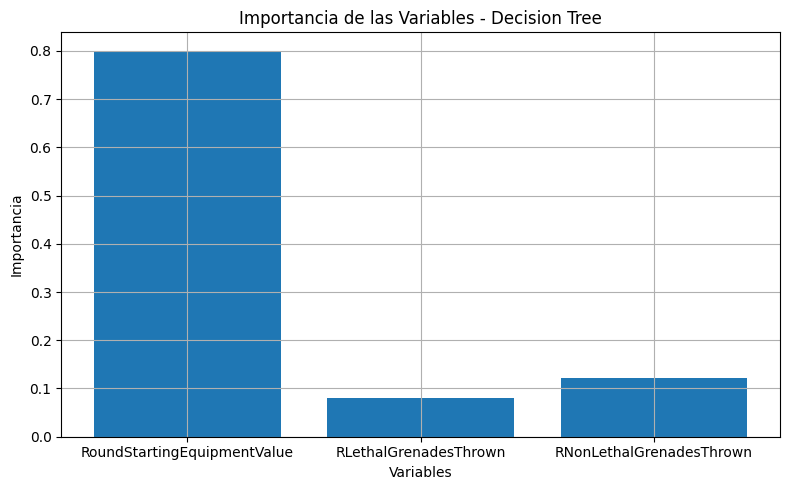

In [15]:
import matplotlib.pyplot as plt

# Obtener importancias
importancias = tree_model.feature_importances_
nombres = X_tree.columns

# Gráfico de barras
plt.figure(figsize=(8, 5))
plt.bar(nombres, importancias)
plt.title('Importancia de las Variables - Decision Tree')
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.grid(True)
plt.tight_layout()
plt.show()